# **Producto Integrador de Aprendizaje: Reporte**

Cargamos nuestro dataset limpio e importamos todas las librerías que vamos a utilizar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from wordcloud import WordCloud

df = pd.read_csv("/content/Video_Games_Sales_Cleaned.csv")



**1. Estadísticas descriptivas**

a) Estadísticas descriptivas generales

In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


b) Frecuencia de géneros

In [4]:
df['Genre'].value_counts()

,count
Genre,
Action,3251
Sports,2304
Misc,1686
Role-Playing,1470
Shooter,1282
Adventure,1274
Racing,1225
Platform,875
Simulation,848


c) Frecuencia de plataformas

In [5]:
df['Platform'].value_counts()

,count
Platform,
DS,2131
PS2,2127
PS3,1304
Wii,1290
X360,1234
PSP,1197
PS,1189
PC,938
XB,803


**2. Agrupaciones por género**

a) Ventas globales promedio por género

In [6]:
df.groupby("Genre")["Global_Sales"].mean().sort_values(ascending=False)

,Global_Sales
Genre,
Platform,0.947577
Shooter,0.800468
Role-Playing,0.628456
Racing,0.593273
Sports,0.568247
Fighting,0.531160
Action,0.529942
Misc,0.468488
Simulation,0.459882


b) Ventas globales totales por género

In [7]:
df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

,Global_Sales
Genre,
Action,1722.84
Sports,1309.24
Shooter,1026.20
Role-Playing,923.83
Platform,829.13
Misc,789.87
Racing,726.76
Fighting,444.05
Simulation,389.98


**3. Modelos lineales y correlación**

a) Matriz de correlación

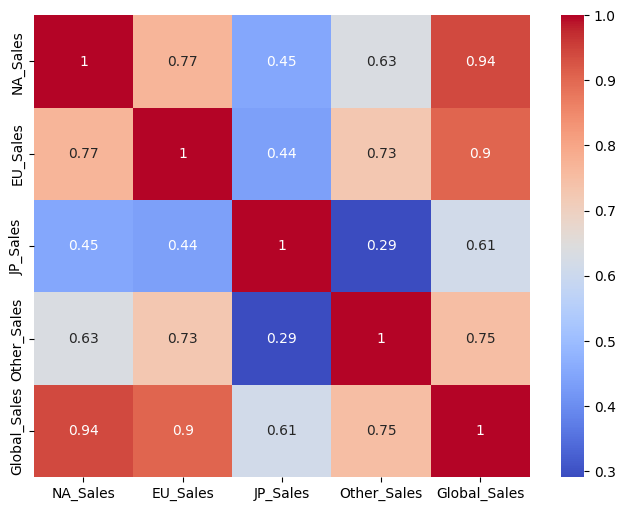

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].corr(), annot=True, cmap="coolwarm")
plt.show()

b) Regresión lineal simple (NA_Sales -> Global_Sales)

In [9]:
X = df[['NA_Sales']]
y = df['Global_Sales']

model = LinearRegression()
model.fit(X, y)

r2 = model.score(X, y)
print("R2 Score:", r2)

R2 Score: 0.8859877363151508


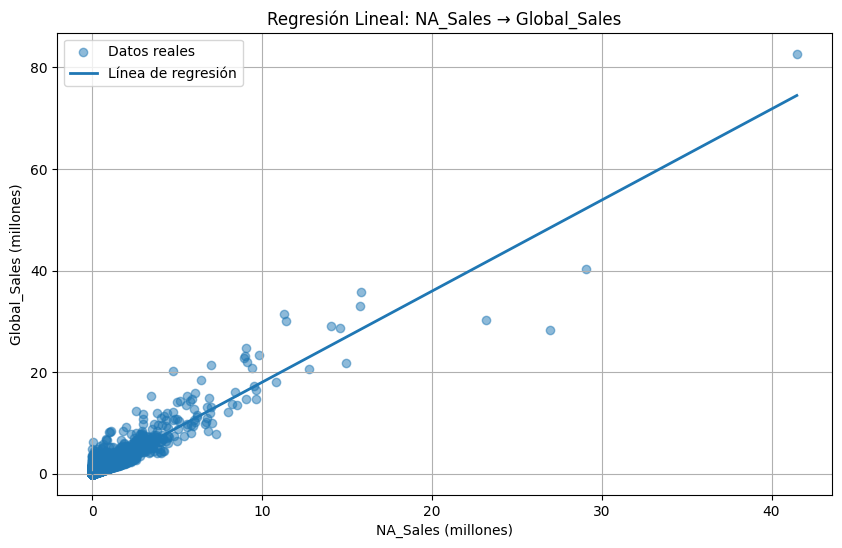

In [11]:
y_pred = model.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.5, label="Datos reales")
plt.plot(X, y_pred, linewidth=2, label="Línea de regresión")

plt.xlabel("NA_Sales (millones)")
plt.ylabel("Global_Sales (millones)")
plt.title("Regresión Lineal: NA_Sales → Global_Sales")
plt.legend()
plt.grid(True)
plt.show()

**4. Clasificación KNN**

a) Creación de etiquetas (ventas najas, medias, altas)

In [12]:
df['Sales_Level'] = pd.qcut(df['Global_Sales'], q=3, labels=['Low','Medium','High'])

b) Entrenamiento en el modelo KNN

In [14]:
features = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
X = df[features]
y = df['Sales_Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9819967266775778

**5. Clustering (K-Means)**

a) Método del codo

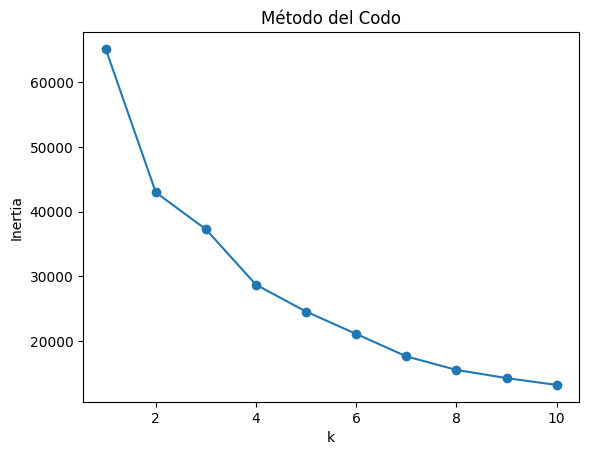

In [15]:
inertia = []
K = range(1,11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.show()

b) Entrenamiento con el número óptimo de clusters

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df[['Name','Global_Sales','Cluster']].head()

,Name,Global_Sales,Cluster
0,Wii Sports,82.74,2
1,Super Mario Bros.,40.24,1
2,Mario Kart Wii,35.82,1
3,Wii Sports Resort,33.00,1
4,Pokemon Red/Pokemon Blue,31.37,1


**6. Forecasting (Series de tiempo con regresión lineal)**

a) Agrupar ventas por año

In [17]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df_yearly = df.groupby('Year')['Global_Sales'].sum().reset_index()

b) Entrenar el modelo

In [18]:
X = df_yearly[['Year']]
y = df_yearly['Global_Sales']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

c) Pronóstico de los próximos 5 años

In [19]:
future_years = np.array(range(df_yearly['Year'].max()+1, df_yearly['Year'].max()+6)).reshape(-1,1)
future_pred = model.predict(future_years)

pd.DataFrame({'Year': future_years.flatten(), 'Forecast': future_pred})

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Year,Forecast
0,2021,460.698061
1,2022,471.393452
2,2023,482.088843
3,2024,492.784233
4,2025,503.479624


**7. Nube de palabras (Text analysis)**

a) "Desde la columna Plataform"

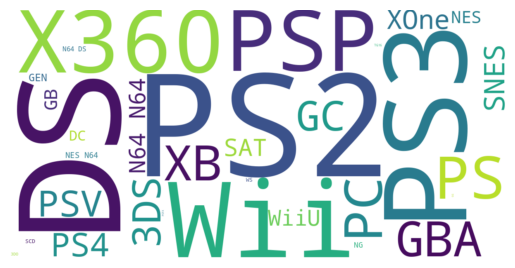

In [20]:
text = " ".join(df['Platform'].astype(str))

wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

b) Desde la columna "Genre"

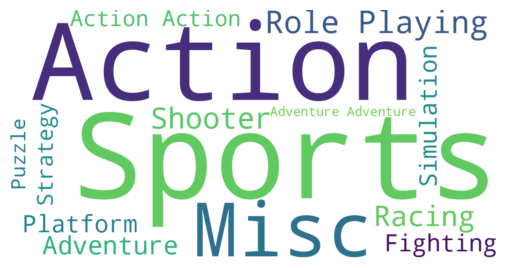

In [21]:
text = " ".join(df['Genre'].astype(str))

wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()